In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
t = np.linspace(0, 2, 1000)

X = lambda t: abs(np.cos(t * np.pi))
V = lambda t: -abs(np.sin(t * np.pi))
V2 = lambda t: abs(np.sin(t * np.pi)) / 2

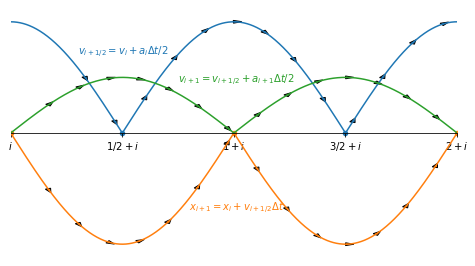

In [4]:
fig, ax = plt.subplots(figsize = (8, 4.5))

b = ax.plot(t, X(t))[0].get_color()
o = ax.plot(t, V(t))[0].get_color()
k = ax.plot(t, V2(t))[0].get_color()

n = 15
t_max = max(t)

dt = 0.001
for i in range(n):
    t_ = 0.33 + i * t_max / n
    dx = X(t_) - X(t_ - dt)
    ax.arrow(t_, X(t_), dt, dx, shape = 'full', lw = 1, head_width = .025, facecolor = b)
   
    t_ = 0.166 + i * t_max / n
    dv = V(t_) - V(t_ - dt)
    
    ax.arrow(t_, V(t_), dt, dv, shape = 'full', lw = 1, head_width = .025, facecolor = o)
    dv = V2(t_) - V2(t_ - dt)
    ax.arrow(t_, V2(t_), dt, dv, shape = 'full', lw = 1, head_width = .025, facecolor = k)
    
t_ = np.arange(t_max + 1)

ax.scatter(t_ + 0.5, X(t_ + 0.5), s = 20)
ax.scatter(t_, V(t_), s = 20)

ax.text(0.8, -0.7, "$x_{i+1} = x_i + v_{i + 1/2}\Delta t$", color = o)
ax.text(0.3, 0.7, "$v_{i+1/2} = v_i + a_i\Delta t / 2$", color = b)
ax.text(0.75, 0.45, "$v_{i+1} = v_{i + 1/2} + a_{i+1}\Delta t / 2$", color = k)

t_ = np.arange(2 * t_max + 1)

ax.set_xticks(t_ / 2)

labels = []
for t__ in t_:
    if int(t__ / 2) == t__ / 2:
        if t__ == 0: label = "$i$"
        else: label = "$%d + i$" % (t__ / 2)
    else:
        label = "$%d/2 + i$" % t__
    labels.append(label)
    
ax.set_xticklabels(labels)

ax.set_xlim(0, t_max)

ax.axes.get_yaxis().set_visible(False)

ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

fig.savefig("leapfrog.png", dpi = 300)
plt.show()